# Simple implementation of Ridge and Lasso regularization using sklearn

In [22]:
from sklearn.datasets import make_regression, load_diabetes
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt

We use regularization to prevent from overfitting. In the loss function, if we use <strong>Ridge</strong>, we add (alpha * m**2) i.e. alpha >=0, and m is coefficient, and we square all the m. <br> whereas if we use <Strong> Lasso </Strong>, we add (alpha * abs(m)) where we take the absoulte value of all the m. <br> <br> USE OF ALPHA: If the value of ALPHA is set to zero, we can call it normal linear regression and when we increase the value of the bias will also start to increase and the overfitting will start to decrease. BUT if we set the value of alpha huge, the model will start to underfit

The difference in the result between Ridge and Lasso will be seen when we use large dimension of data. In Lasso, while penalizing, those features which is less important will get eliminated or will get converted into zero (we can say that Lasso regression does a feature selection internally) But in Ridge, the unimportant feature will never convert into zero but will become close to zero.

In [76]:
X,y = make_regression(n_features=10, n_targets=1, n_samples=200, n_informative=7, noise=20, bias=0.2, random_state=3)

In [77]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.1, random_state=2)

In [78]:
lr = LinearRegression()
lr.fit(Xtrain, ytrain)

LinearRegression()

In [79]:
pred = lr.predict(Xtest)

In [88]:
rtwo = r2_score(ytest, pred)
print('R2 score using normal OLS linear regression:', rtwo)

R2 score using normal OLS linear regression 0.9773295928970842


In [ ]:
While using Ridge regression (L2) and Lasso Regression (L1), we have to pass the value for alpha.

In [89]:
rr = Ridge()
rr.fit(Xtrain, ytrain)
pred_r = rr.predict(Xtest)
rtwor = r2_score(ytest,pred_r)
print('R2 score using normal Ridge regression:', rtwor)

R2 score using normal Ridge regression: 0.9778450282935707


In [90]:
rl = Lasso()
rl.fit(Xtrain, ytrain)
pred_l=rl.predict(Xtest)
rtwol = r2_score(ytest, pred_l)
print('R2 score using normal Lasso regression:', rtwol)

R2 score using normal Lasso regression: 0.9784331613591801


# Visulizing the best fit line when we increase the value of alpha

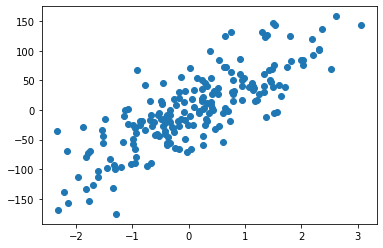

In [98]:
X, y = make_regression(n_samples=200, n_features=1, n_targets=1, n_informative=1, bias=0.2, noise=40)
plt.scatter(X,y)

In [99]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.1, random_state=2)

In [100]:
lr = LinearRegression()
lr.fit(Xtrain, ytrain)

LinearRegression()

In [101]:
pred = lr.predict(Xtest)

In [102]:
rtwo = r2_score(ytest, pred)
print('R2 score using normal OLS linear regression:', rtwo)

R2 score using normal OLS linear regression: 0.6182689523763264


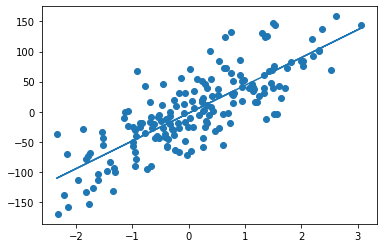

In [103]:
plt.scatter(Xtrain,ytrain)
plt.plot(Xtrain,lr.predict(Xtrain))

1423.0688409340978
1437.5007552541138
1487.092139091409
1617.634183459309
1819.204125682992
2762.635111362635
3188.5581377277817
3384.758914043205


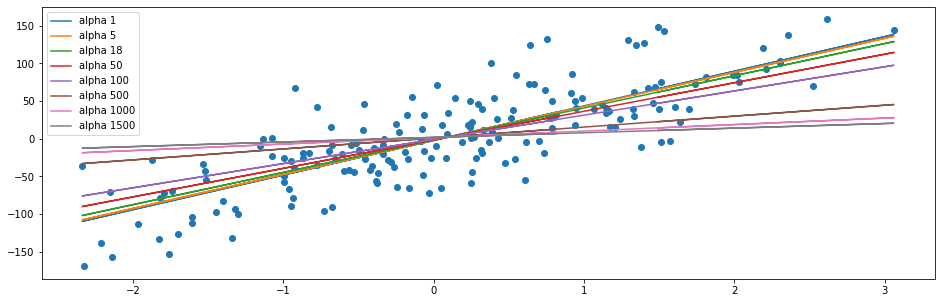

In [120]:
alpha = [1,5,18,50,100,500,1000,1500]
plt.figure(figsize=(16,5))
plt.scatter(Xtrain,ytrain)
for a in alpha:
    rr = Ridge(alpha=a)
    rr.fit(Xtrain, ytrain)
    pred_r = rr.predict(Xtest)
    print(mean_squared_error(ytest, pred_r))
    plt.plot(Xtrain,rr.predict(Xtrain), label=f'alpha {a}')
    plt.legend()